# Institute - ODIN SCHOOL

# Project : Credit Card Approval Prediction
# Submitted by Y KUNAL RAO
### Student ID - S5512

### Objectives of the project :
- The objective of credit card approval prediction is to develop a machine learning model that accurately assesses the creditworthiness of applicants based on historical data. By analyzing factors such as income, credit history, and debt, the model aims to predict whether an individual is likely to default on credit card payments. This predictive capability helps financial institutions make informed decisions, minimizing the risk of defaults and optimizing the approval process. Ultimately, the goal is to enhance efficiency in credit card approval, mitigate financial risks, and provide fair and objective evaluations of applicants to foster responsible lending practices.

### Section - 1

#### 1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank? 
- Predicting a good client for credit card approval is essential for banks to manage risk and enhance profitability in the face of increasing applications and credit card fraud concerns. Utilizing data analytics and machine learning, banks analyze diverse factors like income, employment, credit history, and spending to make informed decisions on approvals and interest rates. This process not only mitigates the risk of default and fraud but also enables targeted marketing for responsible credit card usage, ensuring financial stability and customer satisfaction. 
- In summary, predicting a good client is vital for banks to maintain profitability, minimize risk, and provide optimal service to customers in today's dynamic financial landscape.
#### 2) How is it going to impact the banking sector?
- Automating the credit approval process enhances efficiency, reduces costs, and minimizes risk for banks. Data-driven algorithms assess credit risk, reducing the likelihood of default and financial losses. Faster and more accurate credit decisions improve customer satisfaction and overall experience. Analyzing customer data enables targeted marketing, allowing banks to identify and reach potential customers with tailored campaigns, further optimizing their operations and fostering financial stability.
#### 3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
- Machine Learning (ML) analyzes extensive data, including credit scores, income, and employment history, to identify patterns affecting credit card approval. ML's Data Visualization reveals correlations, enabling accurate decision-making. Predictive models, trained on historical data, forecast approval likelihood based on individual profiles. ML continuously monitors applications, identifying potential fraud or risk trends. This aids banks in proactive fraud prevention and accurate credit approval predictions, enhancing overall data analysis, predictive modeling, and fraud detection capabilities for improved customer protection and reliable decision-making in India.


### Section 2: Initial Hypothesis (or hypotheses)

#### Que 1 ) Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track. 

#### (A) If DA track please aim to identify patterns in the data and important features that may impact a ML model.
   #### Assumption :
- The dataset contains information related to credit card applications, including applicant demographics, financial information, and application details.
- The goal is to perform data analysis to understand the dataset's characteristics and relationships among variables before building a predictive model.

#### Data Analysis and Feature Identification:
- There are some important features that may impact our ML model. Those are Propert_Owner, Annual_income, Type_Income, Housing_type, Employed_days, and Family_Members .

#### (B) If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there is any assumption and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

- It is a Classification problem so, we can’t use the Linear Regression model to predict the output.Classification problem having the value ‘yes’ and ‘no’ or ‘0’ and ‘1’. If we use the Linear regression model we can’t reach the accuracy level. So, for a Classification problem, we can use Logistic Regression or any tree-based model such as a Decision Tree or Random Forest.
- We may need to Tuning the ML models for more accurate results. Here we are going to use Logistic Regression, a Decision Tree, and Random Forest,KNeighborsClassifier, ML models and at the end, we will compare them to find the best ML model for this problem.

### Section 3 : Data Analysis Approach

#### 1. What approach are you going to take in order to prove or disprove your hypothesis?
- Data Exploration: Begin by loading and exploring the dataset. Check the structure, data types, and summary statistics for each variable. There are two CSV files,
- Credit_card.csv contains: Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, Birthday_count, Employed_days, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, and Family_Members
- Credit_card_label.csv contains: Ind_ID, and label
- To perform further analysis these two csv files must merge.

#### 2. What feature engineering techniques will be relevant to your project? 
#### 3. Please justify your data analysis approach.
#### 4. Identify important patterns in your data using the EDA approach to justify your findings.
#### Data Cleaning: Address missing values, duplicates, and outliers. Cleaning the data ensures that subsequent analysis is based on reliable information.
- Filling NaN values: After a quick view of the merged dataset, it is found that there are 1548 entries and 19 columns. Replacing all NaN values from The ‘GENDER’, ‘Annual_income’, and ‘Birthday_count’ columns.
- Deleting column: The ‘Type_Occupation’ column has more than 30% NaN values. If we replace all the NaN values in this column then the predicted values will be incorrect. So, deleting the whole column is the best move. Also, this column is not very important for the ML model.
- Finding the Outliers: Using the ‘describe()’ function we can take a look at all the data and understand if there are any Outliers present or not. . After the analysis, we found some Outliers in the ‘Employed_days’, and ‘Annual_income’ columns. Those Outliers are removed using IQR

### Section 4 : Machine Learning Approach

#### 1. What method will you use for machine learning based predictions for credit card approval?
- Model Selection: I have Choosen multiple machine learning algorithms suitable for binary classification tasks like logistic regression, KNeighborsClassifier, DecisionTreeClassifier and random forest.

#### Importing required libaries :

In [1]:
### For Data Analysis and Mathamatical Function 
import numpy as np 
import pandas as pd
### For Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
### Removing the Warning 
import warnings 
warnings.filterwarnings('ignore') 
### for spliting the data using the below lib 
from sklearn.model_selection import cross_val_score 
### for Data Encoding 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#### Importing the models :

In [2]:
### Machine Learning models Libraries: 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

#### Importing the dataset :

In [3]:
data1 = pd.read_csv(r"C:\Users\shrut\Downloads\Capstone+Project+1\Credit_card.csv")
data2 = pd.read_csv(r"C:\Users\shrut\Downloads\Capstone+Project+1\Credit_card_label.csv")  

### Merging the file
df = data1.merge(data2,how = "inner", on=["Ind_ID"])

### For SQL File
df_sql = df.copy()

# Part 1 : Data Exploration (Exploratory Data Analysis)

In [4]:
# Lets check top 5 rows of our DataFrame
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
# Lets check bottom 5 rows of our DataFrame
df.tail()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


In [6]:
# Lets check descriptive statistics of the DataFrame
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [7]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [8]:
# Rename the features to a more readable feature names 
df = df.rename(columns={    
    "Ind_ID"              :"ID", 
    'GENDER'              :'Gender',
    'Car_Owner'           :'car',
    'Propert_Owner'       :'property',
    'CHILDREN'            :'Children_count',
    'Annual_income'       :'Income',
    'NAME_INCOME_TYPE'    :'Employment_status',
    'EDUCATION'           :'Education_level',
    'Housing_type'        :'Dwelling',
    'Employed_days'       :'Employment_length',
    'Mobile_phone'        :'mobile_phone',
    'Work_Phone'          :"work_phone",
    'Phone'               :'phone',
    'EMAIL_ID'            :'email_id',
    'Type_Occupation'     :'job_Title',
    'Fmaily_Member'       :'Family_member_count',})

In [9]:
# Lets check summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1548 non-null   int64  
 1   Gender             1541 non-null   object 
 2   car                1548 non-null   object 
 3   property           1548 non-null   object 
 4   Children_count     1548 non-null   int64  
 5   Income             1525 non-null   float64
 6   Type_Income        1548 non-null   object 
 7   Education_level    1548 non-null   object 
 8   Marital_status     1548 non-null   object 
 9   Dwelling           1548 non-null   object 
 10  Birthday_count     1526 non-null   float64
 11  Employment_length  1548 non-null   int64  
 12  mobile_phone       1548 non-null   int64  
 13  work_phone         1548 non-null   int64  
 14  phone              1548 non-null   int64  
 15  email_id           1548 non-null   int64  
 16  job_Title          1060 

In [10]:
df.shape

(1548, 19)

In [11]:
# Lets check null values in the DataFrame
df.isnull().sum()

ID                     0
Gender                 7
car                    0
property               0
Children_count         0
Income                23
Type_Income            0
Education_level        0
Marital_status         0
Dwelling               0
Birthday_count        22
Employment_length      0
mobile_phone           0
work_phone             0
phone                  0
email_id               0
job_Title            488
Family_Members         0
label                  0
dtype: int64

#### Visualizing the missing values :

<Axes: >

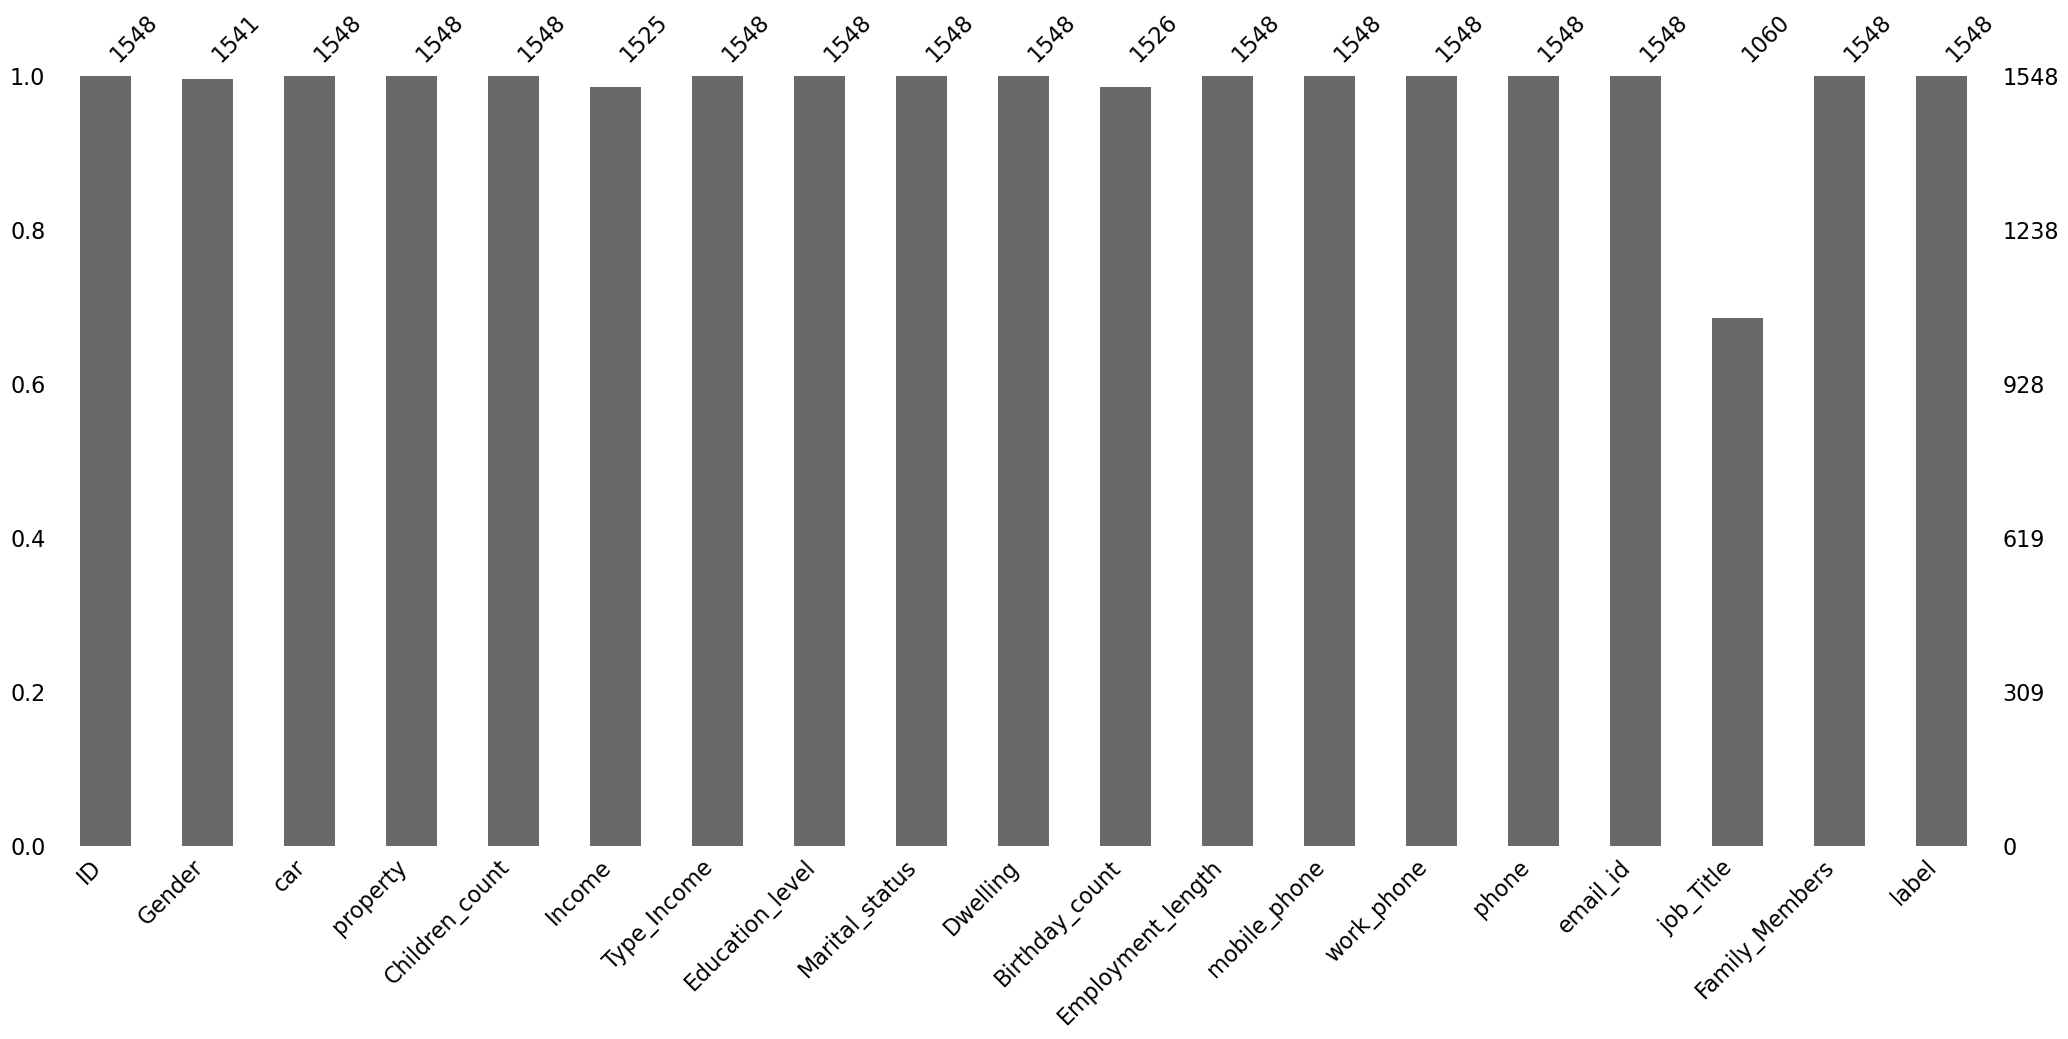

In [12]:
import missingno as msno
msno.bar(df)

<Axes: >

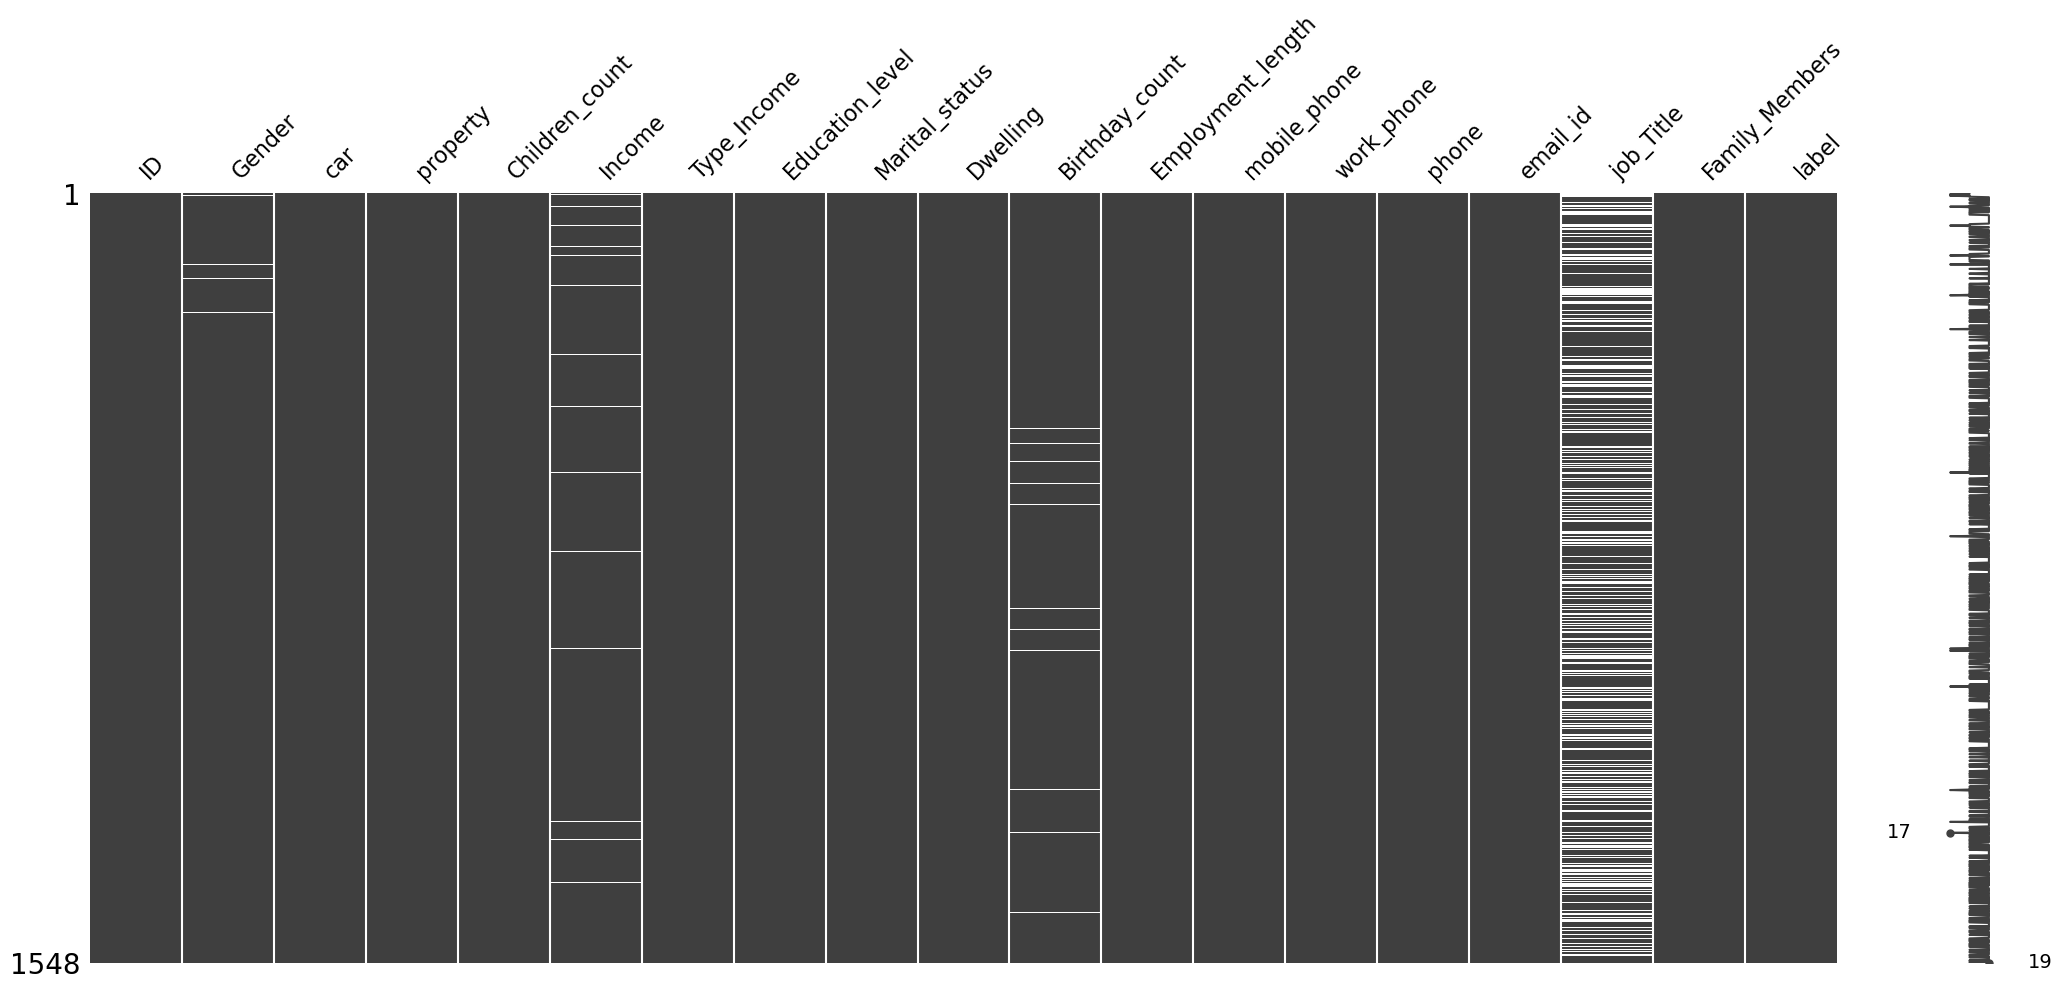

In [13]:
msno.matrix(df)

<Axes: >

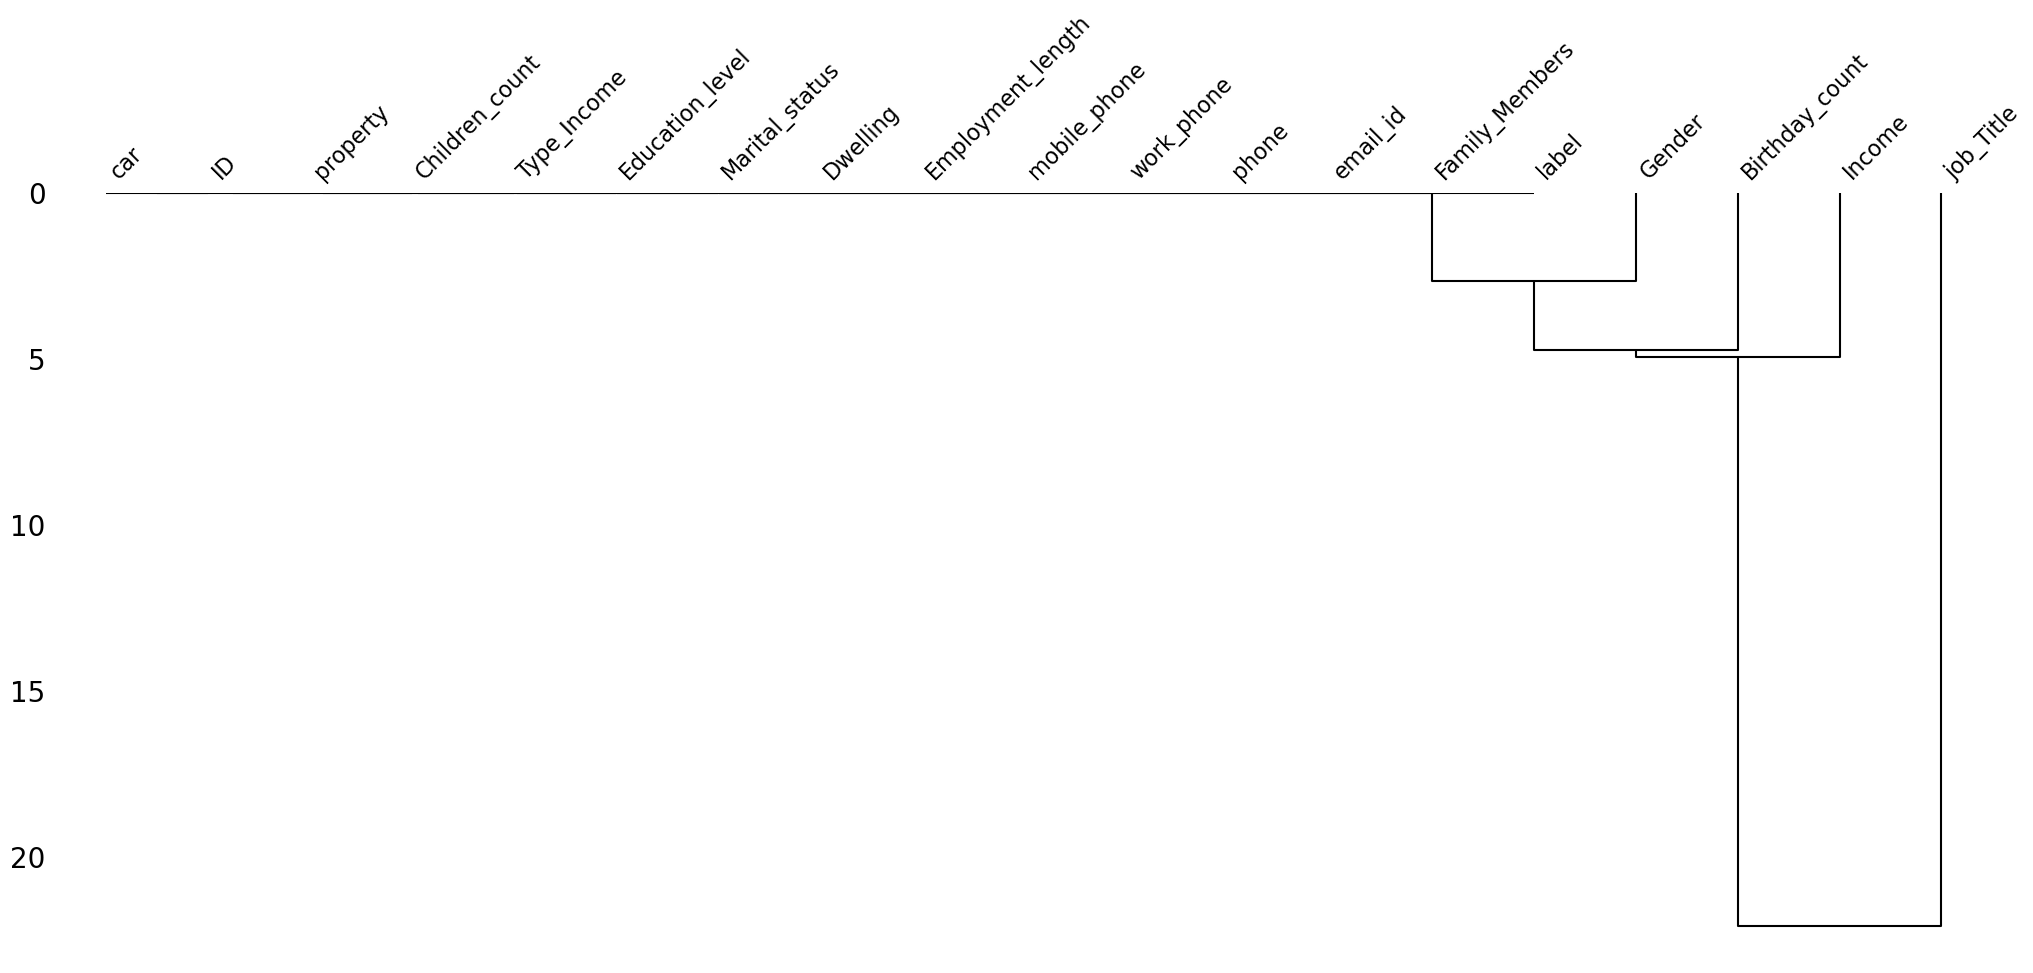

In [14]:
msno.dendrogram(df)

In [15]:
df.isnull().sum()

ID                     0
Gender                 7
car                    0
property               0
Children_count         0
Income                23
Type_Income            0
Education_level        0
Marital_status         0
Dwelling               0
Birthday_count        22
Employment_length      0
mobile_phone           0
work_phone             0
phone                  0
email_id               0
job_Title            488
Family_Members         0
label                  0
dtype: int64

#### 1) Handling missing values	of Gender

In [16]:
df["Gender"].isnull().sum()

7

In [17]:
# cheking for unique values 
df["Gender"].unique()

array(['M', 'F', nan], dtype=object)

In [18]:
# Impute missing values in 'Gender'column with the mode 
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [19]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

In [20]:
df["Gender"].isnull().sum()

0

#### 2) Handling missing values of Income

In [21]:
df["Income"].isnull().sum()

23

In [22]:
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [23]:
df["Income"].unique()

array([ 180000.        ,  315000.        ,  191399.32622951,
        450000.        ,   90000.        ,  472500.        ,
        270000.        ,  126000.        ,  202500.        ,
        157500.        ,  112500.        ,  540000.        ,
        292500.        ,  135000.        ,   76500.        ,
        215100.        ,  225000.        ,   67500.        ,
        171000.        ,  103500.        ,   99000.        ,
        391500.        ,   65250.        ,   72900.        ,
        360000.        ,  256500.        ,  675000.        ,
        247500.        ,   85500.        ,  121500.        ,
        130500.        ,  211500.        ,   81000.        ,
         72000.        ,  148500.        ,  162000.        ,
        195750.        ,  585000.        ,  216000.        ,
        306000.        ,  108000.        ,   63000.        ,
         45000.        ,  337500.        ,  131400.        ,
        117000.        ,  445500.        ,  234000.        ,
       1575000.        ,

#### 3) Handling missing values of Birthday_count        

In [24]:
df["Birthday_count"].isnull().sum()

22

In [25]:
df["Birthday_count"].unique()

array([-18772., -13557.,     nan, ..., -10229., -15292., -16601.])

In [26]:
df['Birthday_count'].fillna(df['Birthday_count'].mean(),inplace=True)

In [27]:
df["Birthday_count"].unique()

array([-18772.        , -13557.        , -16040.34207077, ...,
       -10229.        , -15292.        , -16601.        ])

In [28]:
df["Birthday_count"].isnull().sum()

0

#### 4) Handling missing values of job_Title            

In [29]:
df['job_Title'].isnull().sum()

488

In [30]:
df['job_Title'].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: job_Title, dtype: int64

In [31]:
# Dropping this column as multiple values are missing
df.drop(columns = ['job_Title'],inplace=True)

In [32]:
df.head(4)

,ID,Gender,car,property,Children_count,Income,Type_Income,Education_level,Marital_status,Dwelling,Birthday_count,Employment_length,mobile_phone,work_phone,phone,email_id,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,2,1


In [33]:
# Converting all negative values to actual age values
df['Birthday_count']= abs(round((df['Birthday_count']/-365),0))

In [34]:
# Converting negative values of employement length in years
df['Employment_length']= abs(round((df['Employment_length']/-365),0))

In [35]:
# Replacing the extreme values with median
df['Employment_length'].median()

7.0

In [36]:
df['Employment_length'].replace(1001.0,7.0,inplace=True)

In [37]:
df['Gender'].replace(['F','M'], [0,1],inplace=True)
df['car'].replace(['Y','N'], [1,0],inplace=True)
df['property'].replace(['Y','N'], [1,0],inplace=True)

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [39]:
df.head(4)

,ID,Gender,car,property,Children_count,Income,Type_Income,Education_level,Marital_status,Dwelling,Birthday_count,Employment_length,mobile_phone,work_phone,phone,email_id,Family_Members,label
0,5008827,1,1,1,0,180000.00000,1,1,1,1,51.0,7.0,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.00000,0,1,1,1,37.0,2.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.00000,0,1,1,1,44.0,2.0,1,1,1,0,2,1
3,5009749,0,1,0,0,191399.32623,0,1,1,1,37.0,2.0,1,1,1,0,2,1


### Outliers Check

#### Removing outliers in Income

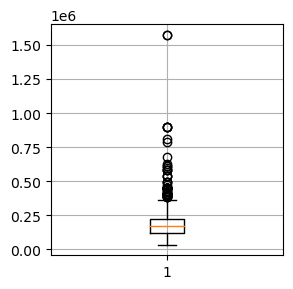

In [40]:
# Checking outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.boxplot(df["Income"])
plt.grid(True)
plt.show()

In [41]:
df.describe()

,ID,Gender,car,property,Children_count,Income,Type_Income,Education_level,Marital_status,Dwelling,Birthday_count,Employment_length,mobile_phone,work_phone,phone,email_id,Family_Members,label
count,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1.548000e+03,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.366925,0.403101,0.652455,0.412791,1.913993e+05,1.870155,3.067829,1.435401,1.290052,43.953488,7.251292,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.482122,0.490679,0.476345,0.776691,1.124080e+05,1.271461,1.348675,0.980264,0.962371,11.520496,5.997912,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,0.000000,0.000000,0.000000,3.375000e+04,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,0.000000,0.000000,0.000000,1.215000e+05,1.000000,1.000000,1.000000,1.000000,34.000000,3.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,0.000000,1.000000,0.000000,1.710000e+05,3.000000,4.000000,1.000000,1.000000,43.000000,7.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,1.000000,1.000000,1.000000,2.250000e+05,3.000000,4.000000,2.000000,1.000000,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,1.000000,1.000000,1.000000,14.000000,1.575000e+06,3.000000,4.000000,4.000000,5.000000,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [42]:
Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
Q1,Q3

(121500.0, 225000.0)

In [43]:
IQR = Q3 - Q1
IQR

103500.0

In [44]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-33750.0, 380250.0)

In [45]:
df1 = df[(df.Income>lower_limit)&(df.Income<upper_limit)]
df1.head(3)

,ID,Gender,car,property,Children_count,Income,Type_Income,Education_level,Marital_status,Dwelling,Birthday_count,Employment_length,mobile_phone,work_phone,phone,email_id,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,51.0,7.0,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,44.0,2.0,1,1,1,0,2,1


In [46]:
df1.shape

(1475, 18)

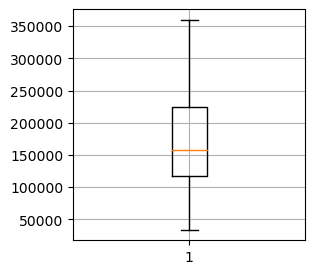

In [47]:
plt.figure(figsize=(3,3))
plt.boxplot(df1["Income"])
plt.grid(True)
plt.show()

#### Removing Outliers in Birthday_count

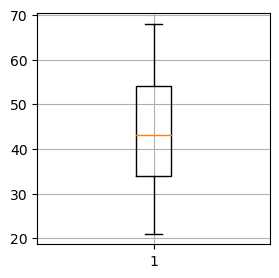

In [48]:
plt.figure(figsize=(3,3))
plt.boxplot(df1["Birthday_count"])
plt.grid(True)
plt.show()

#### Removing Outliers in Employment_length column

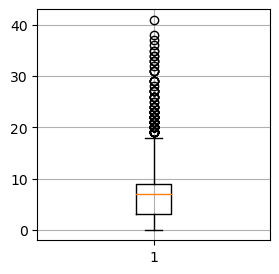

In [49]:
plt.figure(figsize=(3,3))
plt.boxplot(df1['Employment_length'])
plt.grid(True)
plt.show()

In [50]:
Q1 = df1.Employment_length.quantile(0.25)
Q3 = df1.Employment_length.quantile(0.75)
Q1,Q3

(3.0, 9.0)

In [51]:
IQR = Q3-Q1
IQR

6.0

In [52]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-6.0, 18.0)

In [53]:
df2 = df1[(df1['Employment_length']>lower_limit)&(df1['Employment_length']<upper_limit)]
df2.head(3)

,ID,Gender,car,property,Children_count,Income,Type_Income,Education_level,Marital_status,Dwelling,Birthday_count,Employment_length,mobile_phone,work_phone,phone,email_id,Family_Members,label
0,5008827,1,1,1,0,180000.0,1,1,1,1,51.0,7.0,1,0,0,0,2,1
1,5009744,0,1,0,0,315000.0,0,1,1,1,37.0,2.0,1,1,1,0,2,1
2,5009746,0,1,0,0,315000.0,0,1,1,1,44.0,2.0,1,1,1,0,2,1


In [54]:
df2.shape

(1363, 18)

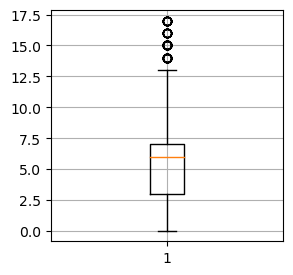

In [55]:
plt.figure(figsize=(3,3))
plt.boxplot(df2['Employment_length'])
plt.grid(True)
plt.show()

# Part 2 : Machine Learning

### Train Test Split

In [56]:
# Splitting the features and targets
x=df2.drop(columns=['label'],axis=1)
y=df2['label']

In [57]:
### Importing the dependencies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [59]:
print(x.shape,x_train.shape,x_test.shape)

(1363, 17) (1090, 17) (273, 17)


#### Accuracy Score
- Comparing the performance of the models

In [60]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [61]:
def compare_models_train_test():
    for model in models:
        model.fit(x_train,y_train)
        y_predicted = model.predict(x_test)
        accuracy = accuracy_score(y_test,y_predicted)
        print("Accuracy of the ",model,"=",accuracy)

In [62]:
compare_models_train_test()

Accuracy of the  LogisticRegression(max_iter=1000) = 0.8754578754578755
Accuracy of the  DecisionTreeClassifier() = 0.8534798534798534
Accuracy of the  RandomForestClassifier() = 0.9194139194139194
Accuracy of the  KNeighborsClassifier() = 0.8681318681318682


### Cross Validation

In [63]:
models = [LogisticRegression(max_iter=1000),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier()]

In [64]:
def compare_models_cv():
    for model in models:
        cv_score =cross_val_score(model,x,y,cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy= mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2) 
        print("cv_score of the",model,"=",cv_score)
        print("mean_accuracy % of the",model,"=",mean_accuracy,"%")

In [65]:
compare_models_cv()

cv_score of the LogisticRegression(max_iter=1000) = [0.89010989 0.89010989 0.89377289 0.89338235 0.89338235]
mean_accuracy % of the LogisticRegression(max_iter=1000) = 89.22 %
cv_score of the DecisionTreeClassifier() = [0.81318681 0.82417582 0.82783883 0.80147059 0.84558824]
mean_accuracy % of the DecisionTreeClassifier() = 82.25 %
cv_score of the RandomForestClassifier() = [0.89010989 0.88278388 0.88278388 0.88235294 0.88970588]
mean_accuracy % of the RandomForestClassifier() = 88.55 %
cv_score of the KNeighborsClassifier() = [0.86080586 0.86446886 0.84981685 0.87132353 0.86029412]
mean_accuracy % of the KNeighborsClassifier() = 86.13 %


#### Model Comparison: 
- Accuracy_Score of the  LogisticRegression(max_iter=1000) = 87.5% , Accuracy_Score of the  DecisionTreeClassifier() = 85.3% ,Accuracy_Score of the  RandomForestClassifier() = 91.2% ,Accuracy_Score of the  KNeighborsClassifier() = 86.8%
- Mean of Cross_val_score of LogisticRegression is 89.22 % , Mean of Cross_val_score of DecisionTreeClassifier is 82.17 % , Mean of Cross_val_score of RandomForestClassifier is 88.63 % , Mean of Cross_val_score of KNeighborsClassifier is 86.13 %
- Here, I am choosing LogisticRegression model because it’s Cross Validation Score for training data was 89.22% %

# Part 3 : SQL 

In [66]:
pip install duckdb

Note: you may need to restart the kernel to use updated packages.


In [67]:
import duckdb
conn =duckdb.connect()
conn.register('df_sql',df_sql)

In [68]:
conn.execute("SELECT * from df_sql;").fetchdf().head(10)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,None,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,None,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,None,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,None,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,None,2,1
5,5009753,None,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,None,2,1
6,5009754,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,None,2,1
7,5009894,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22134.0,365243,1,0,0,0,None,2,1
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1


#### 1. Group the customers based on their income type and find the average of their annual income.

In [69]:
conn.execute("SELECT Type_Income, AVG(Annual_income) as avg_income FROM df_sql GROUP BY Type_Income;").fetchdf()

,Type_Income,avg_income
0,Pensioner,155175.096226
1,Working,181048.757306
2,State servant,211422.413793
3,Commercial associate,234600.000000


#### 2. Find the female owners of cars and property.

In [70]:
conn.execute("SELECT * FROM df_sql WHERE GENDER = 'F' AND Car_Owner = 'Y' AND Propert_Owner = 'Y';").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5018498,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
1,5018501,F,Y,Y,0,NaN,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
2,5018503,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-18950.0,-1002,1,1,1,0,Cooking staff,2,1
3,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185,1,0,1,0,None,2,1
4,5036660,F,Y,Y,0,76500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23835.0,365243,1,0,0,0,None,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,5048458,F,Y,Y,1,126000.0,Working,Higher education,Married,House / apartment,-9441.0,-157,1,0,0,0,None,3,0
173,5023719,F,Y,Y,0,175500.0,Pensioner,Higher education,Married,House / apartment,-22077.0,365243,1,0,1,0,None,2,0
174,5033520,F,Y,Y,3,180000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12559.0,-5862,1,0,1,0,Medicine staff,5,0
175,5024049,F,Y,Y,1,144000.0,Working,Higher education,Married,House / apartment,-12903.0,-2924,1,0,0,0,Accountants,3,0


#### 3. Find the male customers who are staying with their families.

In [71]:
conn.execute("SELECT * FROM df_sql WHERE GENDER = 'M' AND Family_Members > 1;").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,None,2,1
1,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
2,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,1,0,1,1,Core staff,3,1
3,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,1,0,0,1,None,3,1
4,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,5096856,M,Y,Y,0,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17975.0,-3476,1,0,0,0,Drivers,2,0
466,5090942,M,N,N,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-13336.0,-1436,1,0,0,0,Low-skill Laborers,2,0
467,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3,0
468,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0


#### 4. Please list the top five people having the highest income ?

In [72]:
conn.execute("SELECT* FROM df_sql ORDER BY Annual_income DESC LIMIT 5;").fetchdf()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5143231,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2,0
1,5143235,F,Y,Y,1,1575000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10142.0,-2479,1,0,0,0,Managers,2,0
2,5090470,M,N,Y,1,900000.0,Working,Secondary / secondary special,Married,House / apartment,-15380.0,-4509,1,0,0,0,Laborers,3,0
3,5079016,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4,0
4,5079017,M,Y,Y,2,900000.0,Commercial associate,Higher education,Married,House / apartment,-9889.0,-1000,1,0,0,0,Managers,4,0


#### 5. How many married people are having bad credit?

In [73]:
conn.execute("SELECT COUNT(*) FROM df_sql WHERE Marital_status = 'Married' AND label = 0;").fetchdf()

,count_star()
0,935


#### 6. What is the highest education level and what is the total count?

In [74]:
conn.execute("SELECT EDUCATION AS HighestEducation, COUNT(*) AS TotalCount FROM df_sql GROUP BY EDUCATION ORDER BY TotalCount DESC LIMIT 1;").fetchdf()

,HighestEducation,TotalCount
0,Secondary / secondary special,1031


#### 7. Between married males and females, who is having more bad credit?

In [75]:
conn.execute("SELECT Marital_status, GENDER, COUNT(*) AS BadCreditCount FROM df_sql WHERE label = 0 AND Marital_status = 'Married' GROUP BY Marital_status, GENDER;").fetchdf()

,Marital_status,GENDER,BadCreditCount
0,Married,None,1
1,Married,F,566
2,Married,M,368


# Thankyou 